https://datafai.com/auto-arima-using-pyramid-arima-python-package/

Holt Winters time series forecasting

In [1]:
#pip install numpy
#pip install scipy
#pip install sklearn
#pip install pandas
#pip install statsmodel
#pip install pyramid

In [2]:
import warnings
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pyplot import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics
from pyramid import *
from pyramid.arima import auto_arima
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [4]:
flight_data=sns.load_dataset('flights')
flight_data.head()
flight_data.tail()
flight_data.shape
flight_data.describe()
flight_data.info()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
flight_data_pivot=flight_data.pivot('month','year','passengers')
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


<Figure size 1080x360 with 0 Axes>

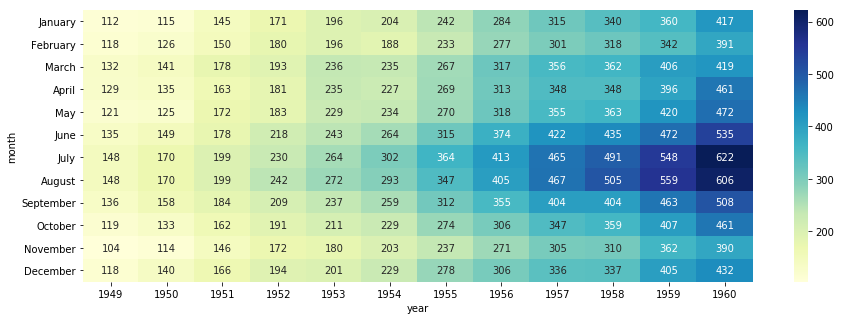

In [6]:
plt.figure(figsize=(15,5))
sns.heatmap(flight_data_pivot,annot=True,fmt='d',cmap='YlGnBu')
plt.show()

In [7]:
month=pd.date_range('19490131',periods=144,freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [8]:
flight_data['datestamp']=month
flight_data.head()

,year,month,passengers,datestamp
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


In [9]:
data=flight_data.loc[:,('datestamp','passengers')]
data.head()
data.describe()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
data.set_index('datestamp',inplace=True)
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


<Figure size 1080x720 with 0 Axes>

Text(0.5,0,'Time')

Text(0,0.5,'Passengers in 1000')

Text(0.5,1,'# of Passengers over Time')

<function matplotlib.pyplot.show>

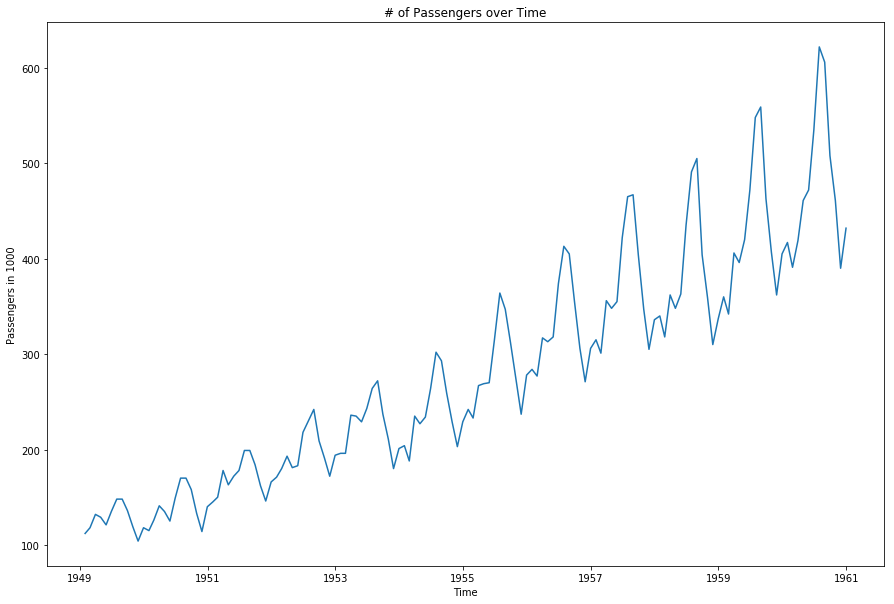

In [11]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Passengers in 1000')
plt.title('# of Passengers over Time')
plt.show

In [12]:
decomposition=seasonal_decompose(data,model='multiplicative')

<Figure size 1440x720 with 0 Axes>

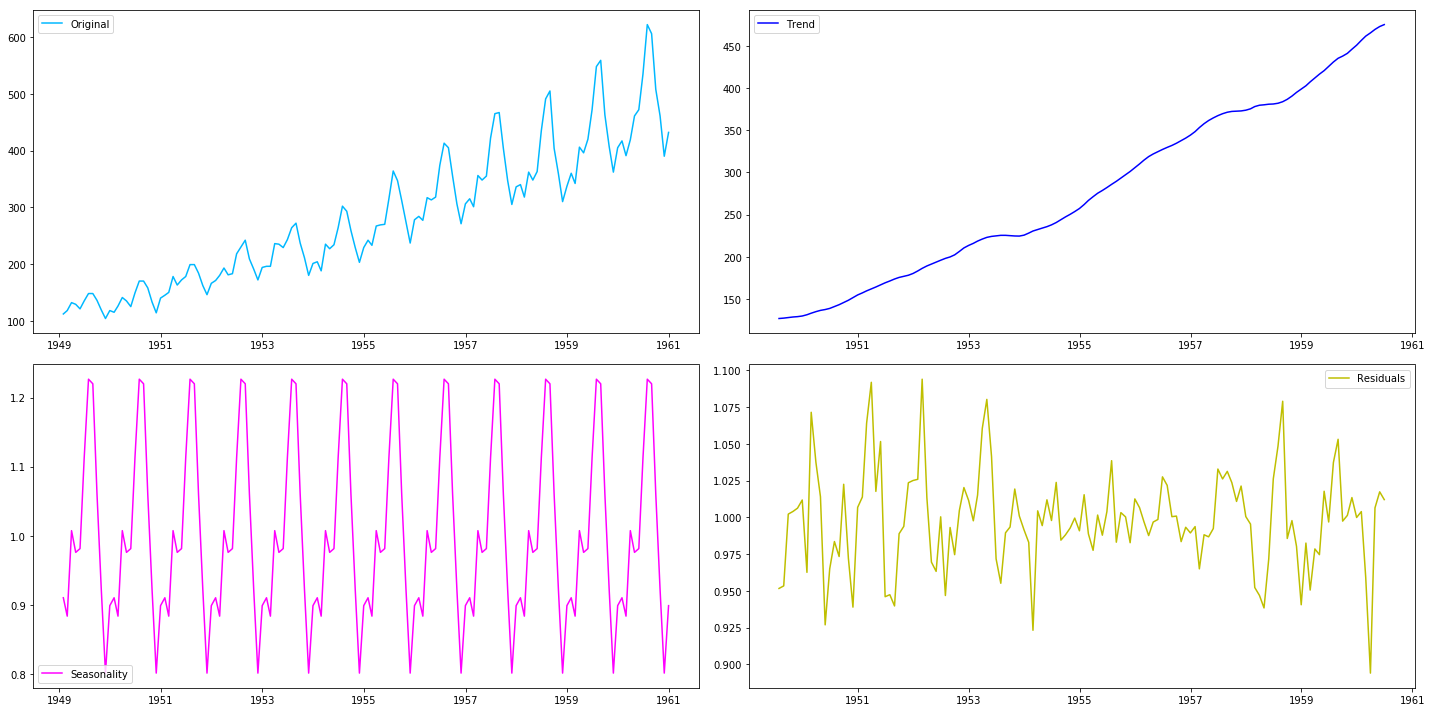

In [13]:
#plot trend of the series
plt.figure(figsize=(20,10))
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(data,color='#00b8ff',label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal,color='#ff00ff',label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [14]:
import pyramid #; print(pyramid.__file__)

c:\python27\lib\site-packages\pyramid\__init__.pyc


In [15]:
from pyramid.arima  import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.is_stationary(data)

(0.99, False)

In [16]:
train,test=data[:100],data[100:]
train.shape
test.shape

(100, 1)

(44, 1)

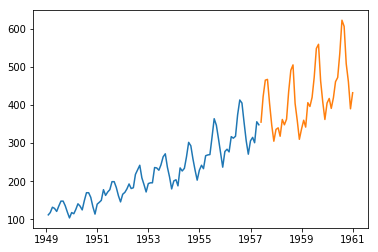

In [17]:
plt.plot(train)
plt.plot(test)
plt.show()

In [20]:
Arima_model=auto_arima(train,start_p=1,
                       start_q=1,
                       max_p=8,
                       max_q=8,
                       startP=0,
                       start_Q=0,
                      max_P=8,
                      max_Q=8,
                      m=12,
                      seasonal=True,
                      trace=True,
                      d=1,
                      D=1,
                      error_action='warn',
                      supress_warnings=True,
                      stepwise=True,
                      random_state=20,n_fits=30)
#
Arima_model.summary()

AttributeError: 'module' object has no attribute '__version__'

In [ ]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=44),
                       index=test.index)
prediction.columns=['Predicted_Passengers']
prediction

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper center')
plt.show()

In [ ]:
test['Predicted_Passengers']=prediction
test['error']=test['passengers']-test['Predicted_Passengers']
test

In [ ]:
metrics.mean_absolute_error(test.passengers,test.Predicted_Passengers)

In [ ]:
metrics.mean_squared_error(test.passengers,test.Predicted_Passengers)

In [ ]:
metrics.median_absolute_error(test.passengers,test.Predicted_Passengers)

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(test.Error,color='#ff33CC')
plt.title('Error Distribution Over Time')
plt.subplot(122)
scipy.stats.probplot(test.Error,plot=plt)
plt.show
plt.figure(figsize=(20,10))
pm.autocorr_plot(test.Error)
plt.show()